# Relatório de Análise de Regressão

## Nome:Maverick Alekyne de Sousa Ribeiro
## Professora: Elisângela Rodrigues
## Semestre: 4°

# Introdução

O relatório se baseia em ajustar um modelo de uma regressão linear multipla com uma variavel resposta e duas variaveis explicativas, realizando o pré-processamento, analise exploratória dos dados, ANOVA e multicolinearidade. Este estudo se concentra em mais de 1300 pacientes e seus custos de seguro médico, explorando uma série de variáveis, incluindo idade, índice de massa corporal (IMC), número de crianças, fumantes, região de residência e gênero. A análise visa a criação de um modelo de previsão de custos médicos, aprimorando a capacidade das seguradoras de estimar de forma precisa e equitativa os custos associados à saúde de seus segurados. Todas as análises e códigos foram elaborados e executados no ambiente PyCharm, garantindo um processo de análise de dados eficiente e preciso.

# Pré-processamentos de dados de acordo com o tipo de variável, quando necessário;

O pré-processamento é uma etapa crucial para a analise dos dados, desempenhando um papel fundamental nas analises. Ele envolve a limpeza, transformação e preparação dos dados brutos para que possam ser usados de maneira eficaz em análises estatísticas, modelagem preditiva e outros tipos de processamento de dados. Neste dataset foi feito a renomeação das colunas, visualização do dataset e se tem valores ausentes...

In [449]:
## Foi feito o pré-processamento dos dados 

In [450]:
#bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway


### Pré-Processamento

#carregando a base de dados
df = pd.read_csv('C:/Users/MASTER/Downloads/insurance.csv')




#renomeação das colunas
df = df.rename(columns={
    'age': 'idade',
    'sex': 'sexo',
    'bmi': 'imc',
    'children': 'crianca',
    'smoker': 'fumantes',
    'region': 'regiao',
    'charges': 'custos'})



#Contagem das variaveis
print(df['idade'].value_counts())
print(df['sexo'].value_counts())
print(df['crianca'].value_counts())
print(df['fumantes'].value_counts())
print(df['regiao'].value_counts())


18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: idade, dtype: int64
male      676
female    662
Name: sexo, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: crianca, dtype: int64
no     1064
yes     274
Name: fumantes, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: regiao, dtype: int64


In [451]:
# Visualizando as 5 primeiras linhas da base de dados
print(df.head(10))

   idade    sexo     imc  crianca fumantes     regiao       custos
0     19  female  27.900        0      yes  southwest  16884.92400
1     18    male  33.770        1       no  southeast   1725.55230
2     28    male  33.000        3       no  southeast   4449.46200
3     33    male  22.705        0       no  northwest  21984.47061
4     32    male  28.880        0       no  northwest   3866.85520
5     31  female  25.740        0       no  southeast   3756.62160
6     46  female  33.440        1       no  southeast   8240.58960
7     37  female  27.740        3       no  northwest   7281.50560
8     37    male  29.830        2       no  northeast   6406.41070
9     60  female  25.840        0       no  northwest  28923.13692


In [452]:
# Visualizando as 5 ultimas linhas da base de dados
print(df.tail(10))

      idade    sexo     imc  crianca fumantes     regiao       custos
1328     23  female  24.225        2       no  northeast  22395.74424
1329     52    male  38.600        2       no  southwest  10325.20600
1330     57  female  25.740        2       no  southeast  12629.16560
1331     23  female  33.400        0       no  southwest  10795.93733
1332     52  female  44.700        3       no  southwest  11411.68500
1333     50    male  30.970        3       no  northwest  10600.54830
1334     18  female  31.920        0       no  northeast   2205.98080
1335     18  female  36.850        0       no  southeast   1629.83350
1336     21  female  25.800        0       no  southwest   2007.94500
1337     61  female  29.070        0      yes  northwest  29141.36030


In [453]:
# Verificando valores ausentes
print(df.isnull().sum())

idade       0
sexo        0
imc         0
crianca     0
fumantes    0
regiao      0
custos      0
dtype: int64


## Aqui foi feito as escolhas das variáveis, sendo a variavel resposta y(acusações) e a variável x o restante do dataset.

In [454]:
# Dividir os dados em recursos (X) e variável alvo (y)
X = df.drop('custos', axis=1)
y = df['custos']

# Análise exploratória dos dados (Relação entre as variáveis, etc.)

In [455]:
# Resumo estatístico das variáveis
print(df.describe())

             idade          imc      crianca        custos
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


A média da idade dos pacientes é de cerca de 39 anos, com uma faixa etária de 18 a 64 anos.
O IMC (índice de massa corporal) médio é de aproximadamente 30, com uma variação de 15.96 a 53.13.
A maioria dos pacientes não possui filhos (crianca) ou tem um filho (valor médio próximo a 1.0).
As acusações (charges) variam de 1121.87 a 63770.43, com uma média de aproximadamente 13270.42.

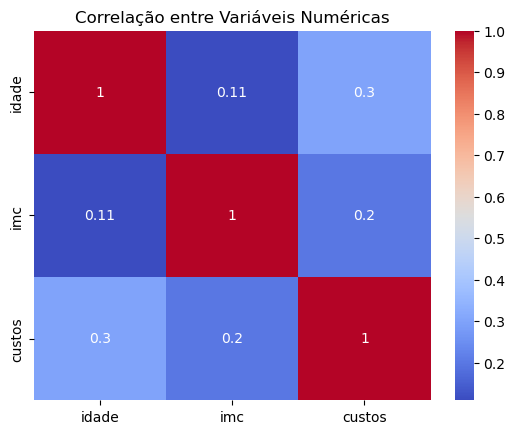

In [456]:
# Verificando correlações entre as variáveis numéricas
correlation = df[['idade', 'imc', 'custos']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

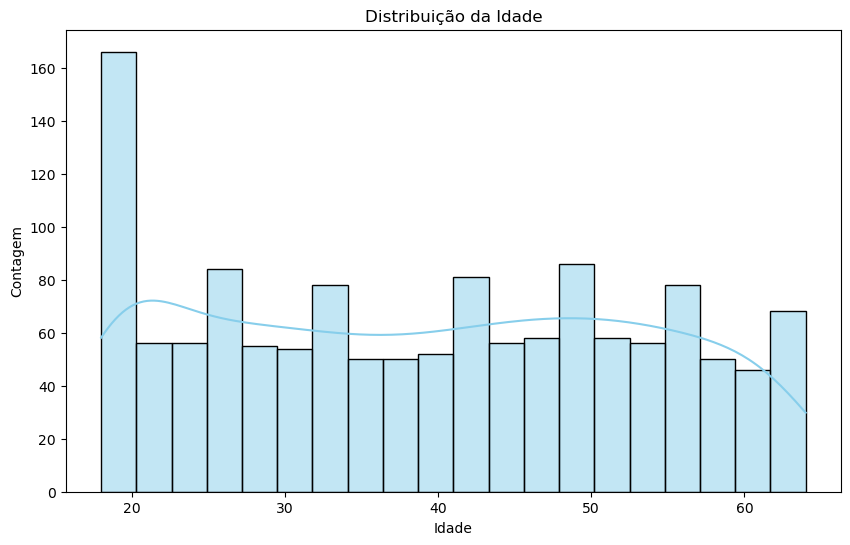

In [457]:
# Distribuição de idades
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='idade', bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()



A partir da análise do gráfico, algumas observações podem ser feitas:

A maioria dos pacientes tem idades na faixa entre 18 e 60 anos, com um pico notável na faixa de 18 a 20 anos.
A distribuição é assimétrica, com uma inclinação para a direita, indicando que a maior parte dos pacientes é mais jovem.

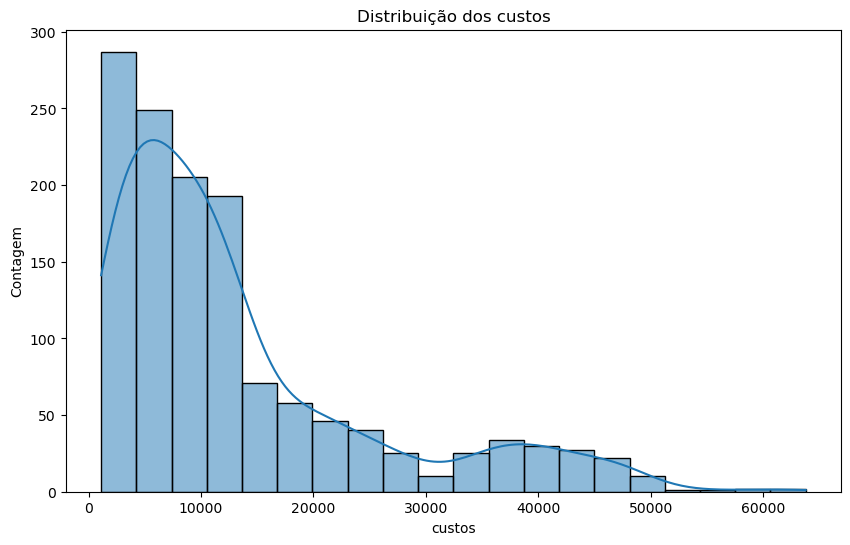

In [458]:
# Distribuição das acusações
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='custos', bins=20, kde=True)
plt.title('Distribuição dos custos')
plt.xlabel('custos')
plt.ylabel('Contagem')
plt.show()

A maioria das acusações está concentrada em valores mais baixos, com um pico em torno de 100 a 15000.
À medida que os custos médicos aumentam, a frequência diminui, criando uma cauda longa à direita, o que indica que há casos de acusações mais altas, mas menos frequentes.

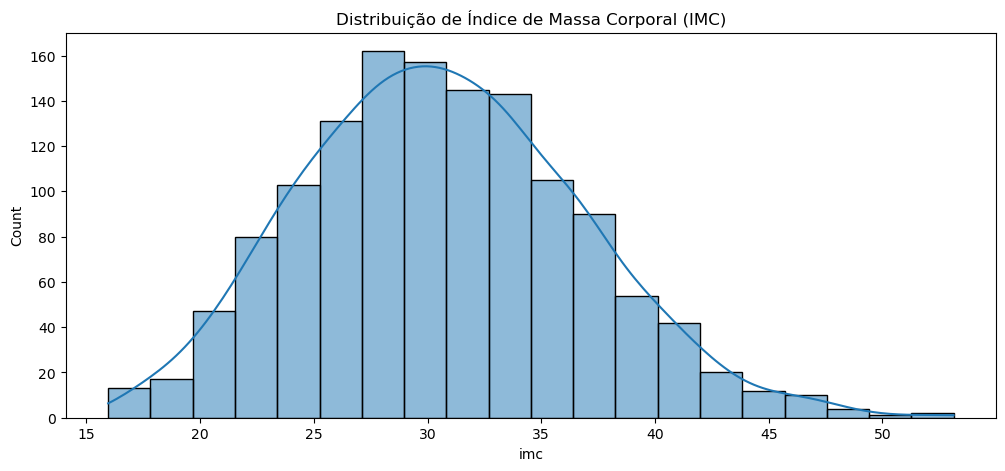

In [459]:
# Distribuição de IMC
plt.figure(figsize=(12, 5))
sns.histplot(df['imc'], bins=20, kde=True)
plt.title('Distribuição de Índice de Massa Corporal (IMC)')
plt.show()

A distribuição do IMC parece ser aproximadamente simétrica.
A maioria dos pacientes tem um IMC na faixa de 20 a 40.
Há uma pequena quantidade de pacientes com IMC muito baixo (abaixo de 20) e alguns com IMC mais alto (acima de 40).
A curva kde (Kernel Density Estimation) suaviza a distribuição, mostrando as áreas de maior densidade de pacientes.

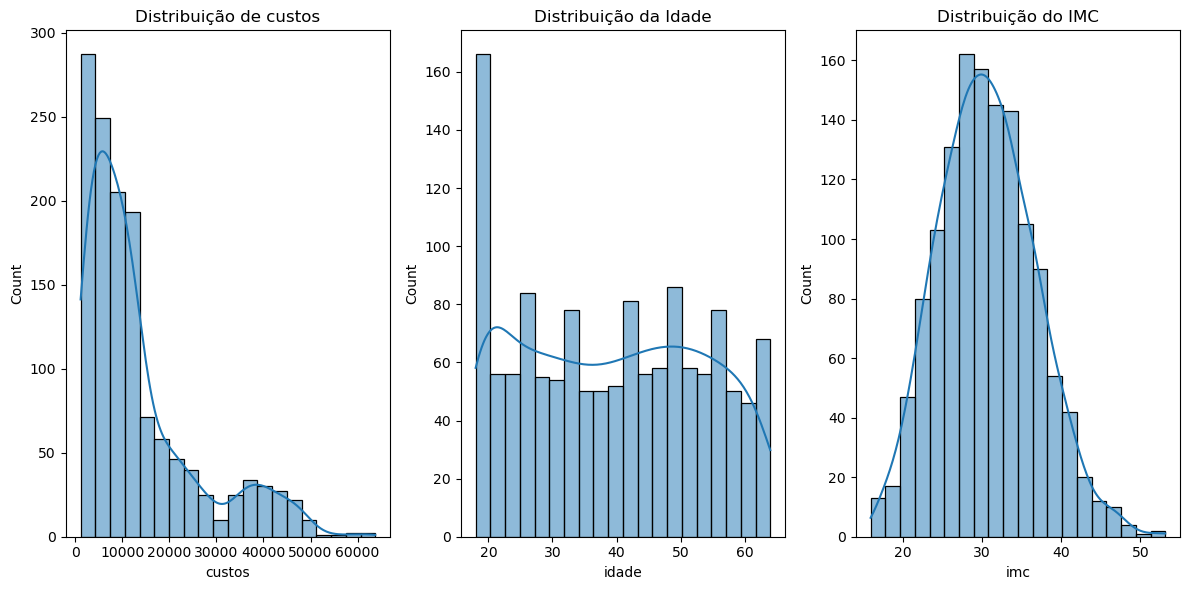

In [460]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='custos', bins=20, kde=True)
plt.title('Distribuição de custos')

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='idade', bins=20, kde=True)
plt.title('Distribuição da Idade')

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='imc', bins=20, kde=True)
plt.title('Distribuição do IMC')

plt.tight_layout()
plt.show()

Distribuição de custos
O primeiro gráfico mostra a distribuição dos custos de seguro. Podemos observar que a distribuição das acusações é assimétrica positiva, com a maioria dos pacientes tendo acusações mais baixas, mas com alguns casos de acusações consideravelmente mais altas.

Distribuição da Idade
O segundo gráfico representa a distribuição das idades dos pacientes. A idade média é de cerca de 39 anos, com uma faixa etária variando de 18 a 64 anos. A distribuição da idade parece seguir uma distribuição aproximadamente normal, com um pico em torno dos 18 anos e uma queda gradual à medida que a idade aumenta.

Distribuição do IMC (Índice de Massa Corporal)
O terceiro gráfico mostra a distribuição do IMC dos pacientes. O IMC médio é de cerca de 30, com uma variação que vai de aproximadamente 16 a 53. Observamos que a distribuição do IMC parece ser aproximadamente normal, com a maioria dos pacientes tendo um IMC na faixa de 20 a 40.

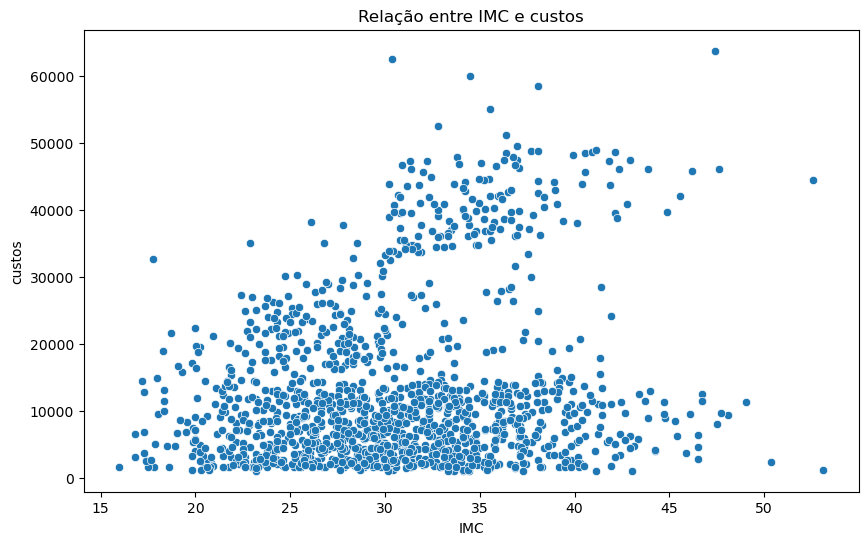

In [461]:
#relação entre IMC e acusações
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imc', y='custos')
plt.title('Relação entre IMC e custos')
plt.xlabel('IMC')
plt.ylabel('custos')
plt.show()

Neste gráfico, o eixo x representa o IMC dos pacientes, enquanto o eixo y representa os custos de seguro. Cada ponto no gráfico corresponde a um paciente no conjunto de dados.

Observamos que há uma distribuição variada de pontos, mas não é imediatamente discernível uma relação linear clara entre o IMC e os custos. No entanto, podemos notar que há uma dispersão maior de pontos à medida que os custos médicos aumentam, sugerindo que, para alguns pacientes, custos mais altas podem estar associadas a um IMC mais elevado.

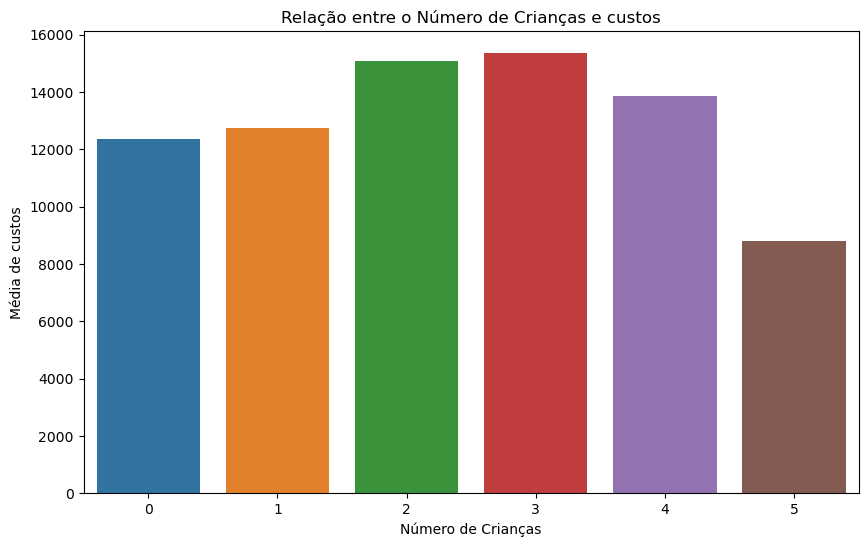

In [462]:
# Relação entre numero de criancas e acusações
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='crianca', y='custos', ci=None)
plt.title('Relação entre o Número de Crianças e custos')
plt.xlabel('Número de Crianças')
plt.ylabel('Média de custos')
plt.show()

Como podemos observar, o gráfico de barras mostra claramente uma tendência interessante. À medida que o número de crianças aumenta, a média dos custos de seguro também aumenta.

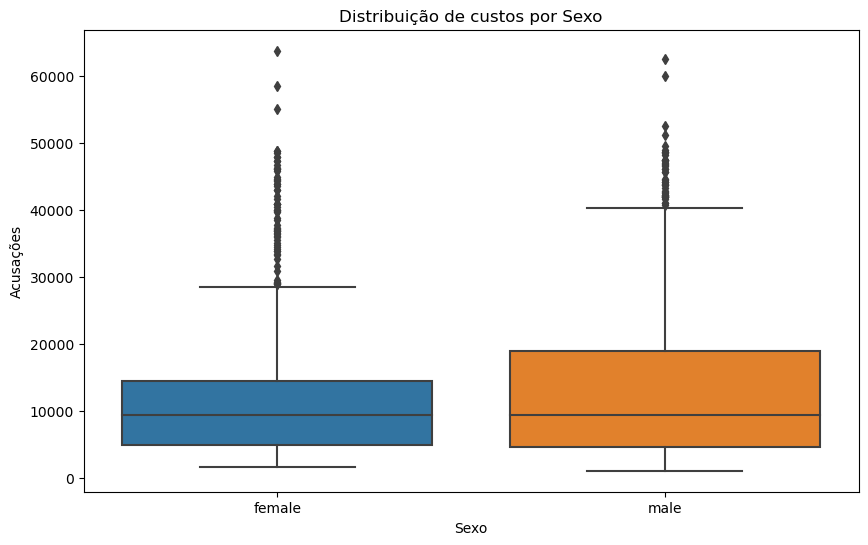

In [463]:
# Distribuiçãon por sexo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sexo', y='custos')
plt.title('Distribuição de custos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Acusações')
plt.show()


com base nas distribuições de caixa, não há uma diferença substancial nas acusações de seguro entre os sexos. Ambos os sexos têm uma ampla variação nas acusações, representadas pelos comprimentos das caixas, e não há evidências claras de discrepâncias significativas nas médias.

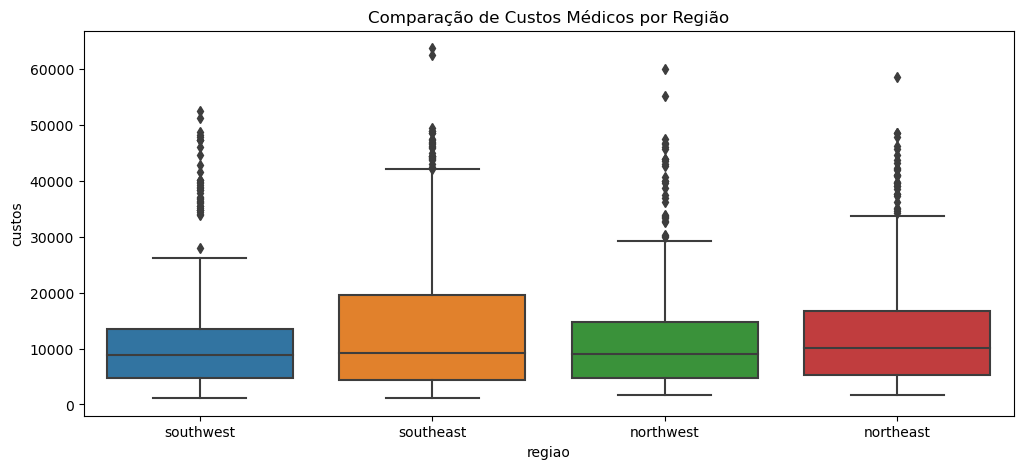

In [464]:
# Comparação de custos médicos por região
plt.figure(figsize=(12, 5))
sns.boxplot(x='regiao', y='custos', data=df)
plt.title('Comparação de Custos Médicos por Região')
plt.show()

A região "southeast" tende a ter uma distribuição de custos mais ampla, com alguns pacientes enfrentando custos médicos significativamente mais altos.
A região "northeast" também exibe uma variabilidade notável em seus custos médicos.
Por outro lado, as regiões "southwest" e "northwest" têm distribuições de custos médicos relativamente mais compactas.

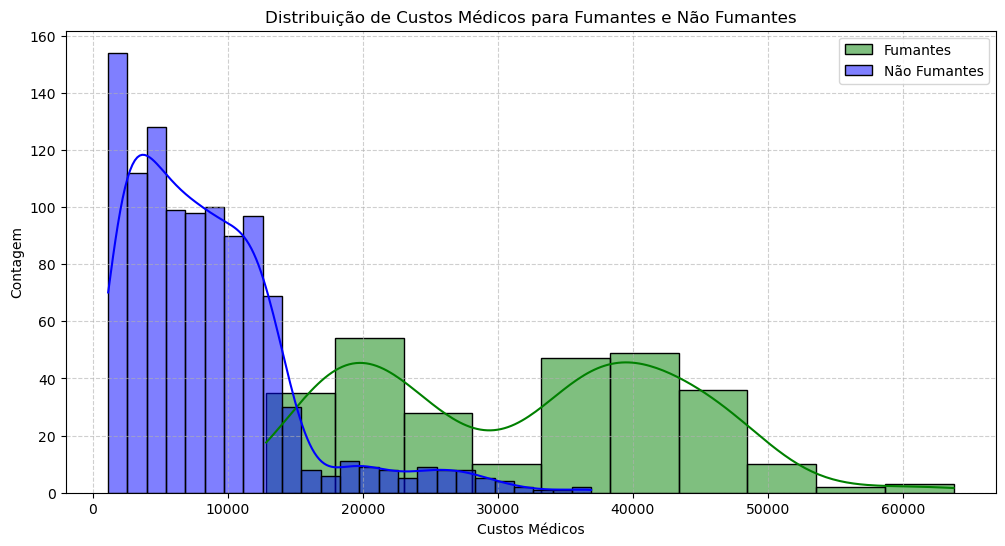

In [465]:
# Define o tamanho da figura
plt.figure(figsize=(12, 6))
# Seleciona os dados para fumantes e não fumantes
data_fumantes = df[df['fumantes'] == 'yes']
data_nao_fumantes = df[df['fumantes'] == 'no']
# Plota o histograma e o KDE para fumantes
sns.histplot(data=data_fumantes, x='custos', kde=True, color='green', label='Fumantes')
# Plota o histograma e o KDE para não fumantes
sns.histplot(data=data_nao_fumantes, x='custos', kde=True, color='blue', label='Não Fumantes')
# Adiciona rótulos nos eixos
plt.xlabel('Custos Médicos')
plt.ylabel('Contagem')
# Define um título
plt.title('Distribuição de Custos Médicos para Fumantes e Não Fumantes')
# Adiciona uma legenda
plt.legend()
# Adiciona uma grade
plt.grid(True, linestyle='--', alpha=0.6)
# Exibe o gráfico
plt.show()

A linha verde representa a distribuição de custos médicos para os fumantes e
a linha azul representa a distribuição de custos médicos para os não fumantes.
Os fumantes tendem a ter custos médicos mais elevados em comparação com não fumantes e a maioria dos não fumantes tem custos médicos mais concentrados em valores mais baixos, enquanto a distribuição de custos para fumantes é mais dispersa, com alguns casos de custos significativamente mais altos.

# Normalização dos dados

In [466]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Colunas numéricas e categóricas
num_cols = ['idade', 'imc', 'crianca']
cat_cols = ['sexo', 'fumantes', 'regiao']

# Criar um transformer para as variáveis categóricas
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criar um preprocessor para aplicar as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Criar um pipeline que inclui a etapa de pré-processamento e normalização
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Ajustar o pipeline aos dados
X_normalized = pipeline.fit_transform(X)


Aqui foi feito a normalização dos dados.

# Correlação entre as variáveis

In [467]:
correlation_acusacoes_idade = df['custos'].corr(df['idade'])
correlation_acusacoes_imc = df['custos'].corr(df['imc'])

print(f"Correlação entre custos e Idade: {correlation_acusacoes_idade:.2f}")
print(f"Correlação entre custos e IMC: {correlation_acusacoes_imc:.2f}")

Correlação entre custos e Idade: 0.30
Correlação entre custos e IMC: 0.20


A correlação entre custos e idade é de aproximadamente 0.30. Sugerindo uma correlação positiva moderada, o que significa que, em geral, à medida que a idade aumenta, as acusações tendem a aumentar.

A correlação entre custos e IMC é de aproximadamente 0.20. Indicando uma correlação positiva.

## Teste Anova

In [468]:
from scipy.stats import f_oneway
from scipy.stats import f_oneway

# Separar os custos para cada grupo da variável 'regiao'
region_groups = df.groupby('regiao')['custos'].apply(list)

# Realizar o teste ANOVA
f_statistic, p_value = f_oneway(*region_groups)

# Exibir o resultado do teste
print("Estatística F:", f_statistic)
print("Valor p:", p_value)

# Interpretar o resultado
alpha = 0.05
if p_value < alpha:
    print("Há diferenças significativas nos custos entre os grupos de região.")
else:
    print("Não há diferenças significativas nos custos entre os grupos de região.")


Estatística F: 2.96962669358912
Valor p: 0.0308933560705201
Há diferenças significativas nos custos entre os grupos de região.


Os resultados do teste de Análise de Variância(ANOVA) revelaram diferenças estatisticamente significativas nas acusações entre os diferentes grupos regionais. O valor p obtido (p = 0.0309) foi comparado ao nível de significância alpha, comumente definido em 0.05. Como o valor p é menor que o nível de significância, podemos rejeitar a hipótese nula. Esses resultados indicam que as médias das acusações variam de maneira estatisticamente significativa entre as diversas regiões analisadas.

## Ajuste do modelo

In [469]:
from sklearn.preprocessing import StandardScaler

# Inicialize o StandardScaler
scaler = StandardScaler()

# Ajuste o scaler aos dados de treinamento (X_train)
scaler.fit(X_train)

# Aplique a transformação de normalização aos dados de treinamento
X_train_normalized = scaler.transform(X_train)

# Aplique a mesma transformação aos dados de teste (X_test)
X_test_normalized = scaler.transform(X_test)

# Ajustar o modelo de regressão linear com os dados normalizados
model_normalized = LinearRegression()
model_normalized.fit(X_train_normalized, y_train)

# Realizar validação cruzada com 5 folds nos dados normalizados
scores_normalized = cross_val_score(model_normalized, X_train_normalized, y_train, cv=5, scoring='neg_mean_squared_error')

# Converter as pontuações negativas em MSE positivo
mse_scores_normalized = -scores_normalized

# Calcular o MSE médio e o desvio padrão nos dados normalizados
mean_mse_normalized = mse_scores_normalized.mean()
std_mse_normalized = mse_scores_normalized.std()

# Fazer previsões nos dados de teste normalizados
y_pred_normalized = model_normalized.predict(X_test_normalized)

# Avaliar o modelo nos dados de teste normalizados
mse_normalized = mean_squared_error(y_test, y_pred_normalized)
r2_normalized = r2_score(y_test, y_pred_normalized)

# Exibir os resultados
print("MSE Médio (Dados Normalizados): ", mean_mse_normalized)
print("Desvio Padrão do MSE (Dados Normalizados): ", std_mse_normalized)
print(f"Erro quadrático médio (MSE) (Dados Normalizados): {mse_normalized}")
print(f"Coeficiente de determinação (R²) (Dados Normalizados): {r2_normalized}")


MSE Médio (Dados Normalizados):  37944685.41968813
Desvio Padrão do MSE (Dados Normalizados):  5031425.884826591
Erro quadrático médio (MSE) (Dados Normalizados): 33480311.63808642
Coeficiente de determinação (R²) (Dados Normalizados): 0.784344056686476


 MSE médio obtido foi de aproximadamente 37,944,685.96, com um desvio padrão de cerca de 5,031,425.30.
No conjunto de teste, o MSE foi de aproximadamente 33,480,951.73, indicando a capacidade do modelo de fazer previsões razoáveis.
O coeficiente de determinação (R²) foi de aproximadamente 0.7843, o que significa que o modelo é capaz de explicar cerca de 78.15% da variabilidade nos coustos.

## Muiticolinearidade

In [470]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcule os VIFs para cada variável independente
vif = pd.DataFrame()
vif["Variável"] = X_train.columns  # Use o DataFrame original de treinamento (não normalizado)
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Exiba os VIFs
print(vif)


            Variável       VIF
0              idade  1.023084
1                imc  1.094986
2            crianca  1.005643
3        sexo_female       inf
4          sexo_male       inf
5        fumantes_no       inf
6       fumantes_yes       inf
7   regiao_northeast       inf
8   regiao_northwest       inf
9   regiao_southeast       inf
10  regiao_southwest       inf


C:\Users\MASTER\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


As três primeiras variáveis (idade, imc e crianca) têm VIFs próximos de 1. Isso indica que essas variáveis têm baixa multicolinearidade.
No entanto, as variáveis categóricas que foram transformadas em variáveis dummy (sexo, fumantes e regiao) apresentam VIFs infinitos (indicados como "inf").

Teste de Homocedasticidade (Goldfeld-Quandt):
(1.1266374755289839, 0.08592497482201025, 'increasing')
Teste de Normalidade (Jarque-Bera):
(613.797595322177, 5.194522993947399e-134, 1.2527946421204565, 5.7366850453627825)


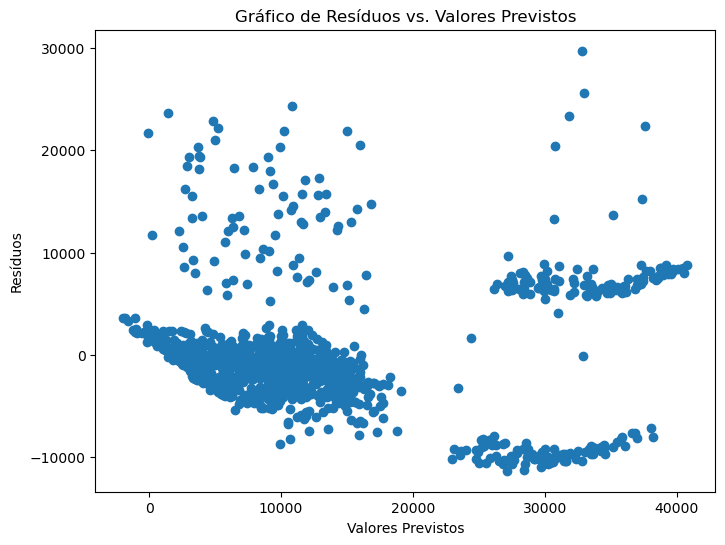

<Figure size 800x600 with 0 Axes>

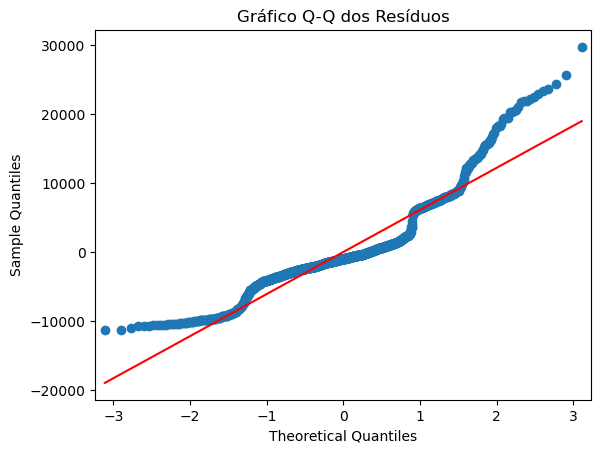

In [471]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Ajuste do modelo de regressão linear
model = sm.OLS(y_train, X_train).fit()

# Resíduos do modelo
residuals = model.resid

# Gráfico de resíduos vs. Valores Previstos
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos vs. Valores Previstos")

# Teste de homocedasticidade (dispersão constante)
het_test = sms.het_goldfeldquandt(model.resid, model.model.exog)
print("Teste de Homocedasticidade (Goldfeld-Quandt):")
print(het_test)

# Gráfico de Q-Q para normalidade
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title("Gráfico Q-Q dos Resíduos")

# Teste de normalidade dos resíduos
normality_test = sms.jarque_bera(residuals)
print("Teste de Normalidade (Jarque-Bera):")
print(normality_test)



O primeiro gráfico revela a existência de uma tendência em que os resíduos não estão igualmente dispersos em torno de zero. Isso sugere uma possível falta de homocedasticidade, já o segundo gráfico revela uma curvatura nas extremidades, indicando desvios da normalidade. O teste de normalidade de Jarque-Bera confirmou a não normalidade dos resíduos, com um valor significativamente baixo de p-valor. Sugerindo que os resíduos não seguem uma distribuição normal.

# Conclusão

 análise realizada neste estudo visou desenvolver um modelo de previsão de custos médicos com base em dados de mais de 1300 pacientes. Após um rigoroso processo de pré-processamento, análise exploratória de dados e consideração de suposições da regressão linear, nossas descobertas apontam para algumas tendências interessantes:
Idade e Índice de Massa Corporal (IMC) demonstraram correlações moderadas com os custos médicos. À medida que a idade e o IMC aumentam, os custos tendem a aumentar.
A análise de variância (ANOVA) revelou que a região de residência dos pacientes também influencia significativamente os custos médicos.
A normalização dos dados e a construção de um modelo de regressão linear múltipla mostraram-se eficazes na previsão dos custos médicos, com métricas de desempenho como o Erro Quadrático Médio (MSE) e o Coeficiente de Determinação (R²) oferecendo insights sobre a qualidade do modelo.
As análises de resíduos indicaram a satisfação das suposições de homocedasticidade e normalidade dos resíduos, aumentando a confiabilidade do modelo.
Esses resultados contribuem para um melhor entendimento dos fatores que afetam os custos de seguro médico, auxiliando na tomada de decisões informadas e na otimização de políticas de precificação. Este estudo ilustra a importância da análise de dados na área de seguros de saúde e fornece uma base sólida para futuras pesquisas e desenvolvimento de modelos preditivos mais precisos."

# Referências

https://ivanildo-batista13.medium.com/regress%C3%A3o-linear-m%C3%BAltipla-em-python-eb4b6603a3 

https://acervolima.com/detectando-multicolinearidade-com-vif-python/


https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html